# Install dependencies

In [168]:
!pip install pandas scikit-learn seaborn joblib matplotlib

# Import libraries

In [169]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from tkinter import *

# Data exploration

## Dataset acquisition

In [170]:
data = pd.read_csv("mushrooms.csv")
pd.set_option('display.max_columns', None)

## Exploratory data analysis

### Information of dataset

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### First five rows in dataset

In [172]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### Last five rows in dataset

In [173]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


### Null values in dataset

In [174]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Dataset dimensions

In [175]:
print("Number of features:", data.shape[1])
print("Number of values:", data.shape[0])

Number of features: 23
Number of values: 8124


### Statistics of datatset

In [176]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Data Preprocessing

## Categorical Encoding

### Change features type to category

In [177]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

### Data encoding

In [178]:
for column in data.columns:
    data[column] = LabelEncoder().fit_transform(data[column])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


## Train-Test Split

### Principal component analysis

In [179]:
X = data.drop('class', axis=1)
y = data['class']
pca = PCA(n_components = 7)
pca_fit = pca.fit_transform(X)

### Split dataset into 80% training and 20% testing

In [180]:
X_train, X_test, y_train, y_test = train_test_split(pca_fit, y, test_size = 0.20, random_state = 42)

# Classification models

In [181]:
models_names = ['Logistic Regression', 'K Neighbors', 'Support Vectore Machine', 'Decision Tree', 'Random Foreest', 'Gradient Boosting']
models_accuracies = []
models_precisions = []
models_recalls = []
models_f1_scores = []
models_supports = []

## 1. Logistic Regression

In [182]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logistic_regression)
models_accuracies.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.8344615384615385


### 1.1 Confusion Matrix

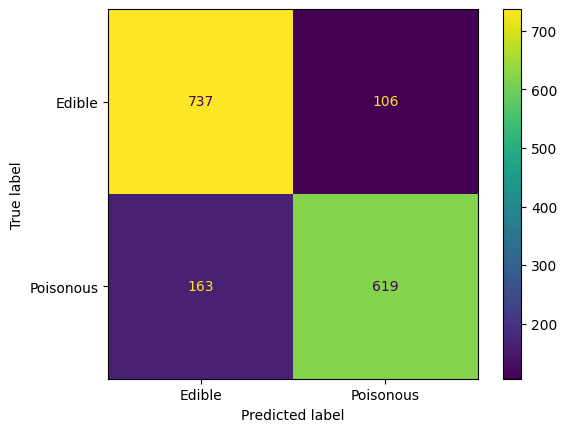

In [184]:
cm = confusion_matrix(y_test, y_pred_logistic_regression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot()

### 1.2 Classification Report

In [185]:
cr = classification_report(y_test, y_pred_logistic_regression, target_names=["Edible", "Poisonous"], output_dict=True)
models_precisions.append(cr.get("weighted avg").get("precision"))
models_recalls.append(cr.get("weighted avg").get("recall"))
models_f1_scores.append(cr.get("weighted avg").get("f1-score"))
models_supports.append(cr.get("weighted avg").get("support"))
print(classification_report(y_test, y_pred_logistic_regression, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.82      0.87      0.85       843
   Poisonous       0.85      0.79      0.82       782

    accuracy                           0.83      1625
   macro avg       0.84      0.83      0.83      1625
weighted avg       0.84      0.83      0.83      1625



### 1.3 ROC curve

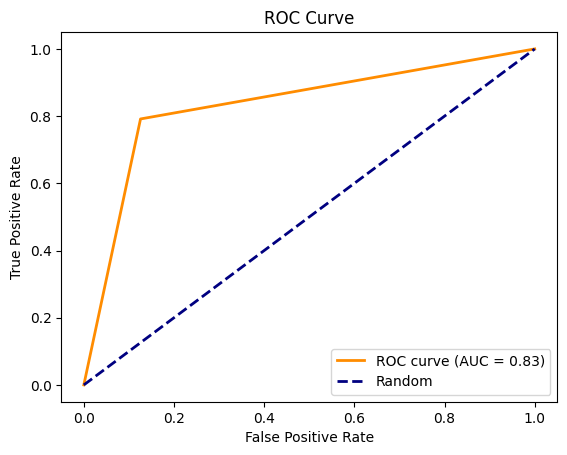

In [186]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic_regression)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 1.4 Dataset graph of actual vs predicted values

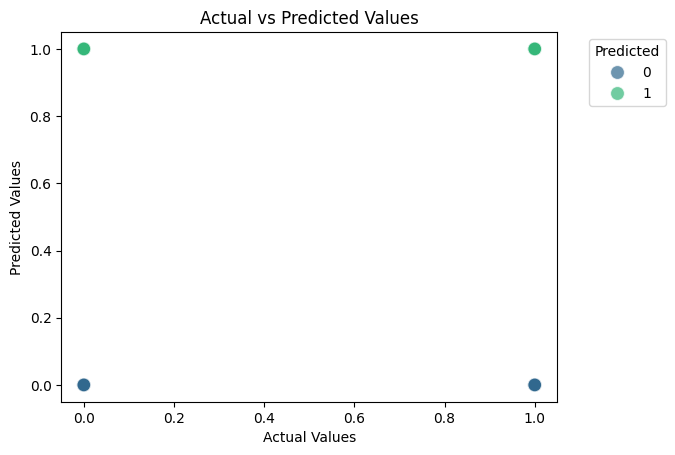

In [187]:
sns.scatterplot(x=y_test, y=y_pred_logistic_regression, hue=y_pred_logistic_regression, palette='viridis', s=100, alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Predicted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 2. K Nearest Neighbors

In [188]:
k_nearest_neighbors = KNeighborsClassifier()
k_nearest_neighbors.fit(X_train, y_train)
y_pred_k_nearest_neighbors = k_nearest_neighbors.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_k_nearest_neighbors)
models_accuracies.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.9833846153846154


### 2.1 Confusion Matrix

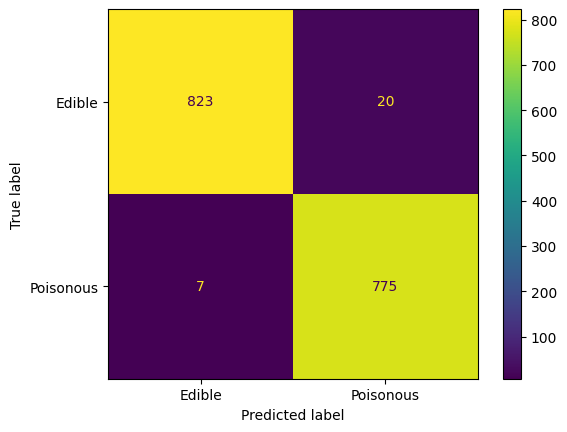

In [189]:
cm = confusion_matrix(y_test, y_pred_k_nearest_neighbors)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot()

### 2.2 Classification Report

In [190]:
cr = classification_report(y_test, y_pred_k_nearest_neighbors, target_names=["Edible", "Poisonous"], output_dict=True)
models_precisions.append(cr.get("weighted avg").get("precision"))
models_recalls.append(cr.get("weighted avg").get("recall"))
models_f1_scores.append(cr.get("weighted avg").get("f1-score"))
models_supports.append(cr.get("weighted avg").get("support"))
print(classification_report(y_test, y_pred_k_nearest_neighbors, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.99      0.98      0.98       843
   Poisonous       0.97      0.99      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### 2.3 ROC curve

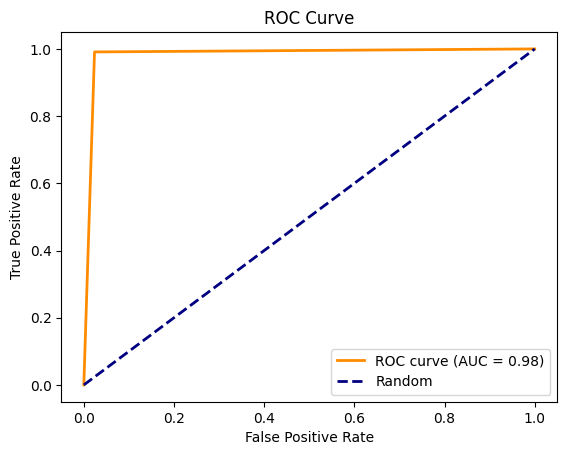

In [191]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_k_nearest_neighbors)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 3. Support Vector Machine

In [192]:
support_vector_machine = SVC()
support_vector_machine.fit(X_train, y_train)
y_pred_support_vector_machine = support_vector_machine.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_support_vector_machine)
models_accuracies.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.952


### 3.1 Confusion Matrix

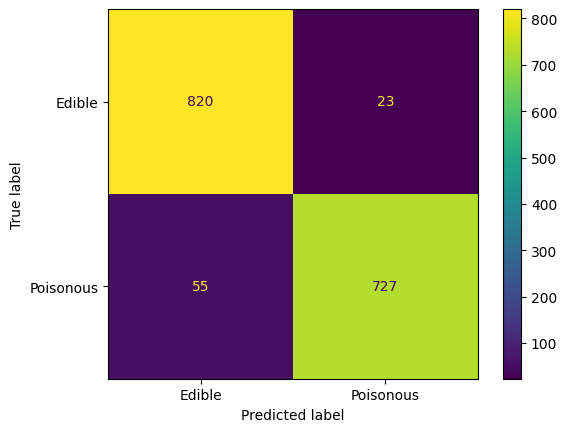

In [193]:
cm = confusion_matrix(y_test, y_pred_support_vector_machine)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot()

### 3.2 Classification Report

In [194]:
cr = classification_report(y_test, y_pred_support_vector_machine, target_names=["Edible", "Poisonous"], output_dict=True)
models_precisions.append(cr.get("weighted avg").get("precision"))
models_recalls.append(cr.get("weighted avg").get("recall"))
models_f1_scores.append(cr.get("weighted avg").get("f1-score"))
models_supports.append(cr.get("weighted avg").get("support"))
print(classification_report(y_test, y_pred_support_vector_machine, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.94      0.97      0.95       843
   Poisonous       0.97      0.93      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### 3.3 ROC curve

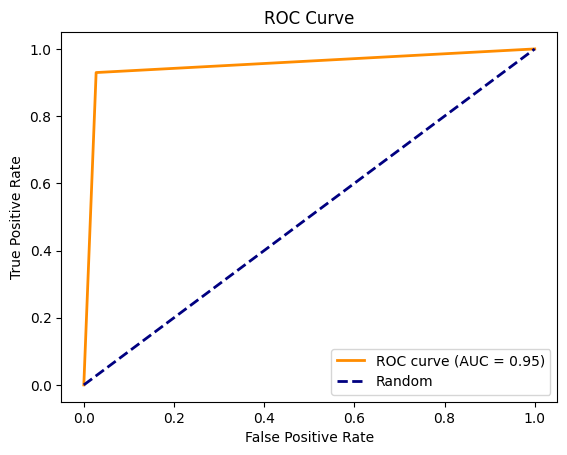

In [195]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_support_vector_machine)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 4. Decision Tree

In [196]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_decision_tree)
models_accuracies.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.9772307692307692


### 4.1 Confusion Matrix

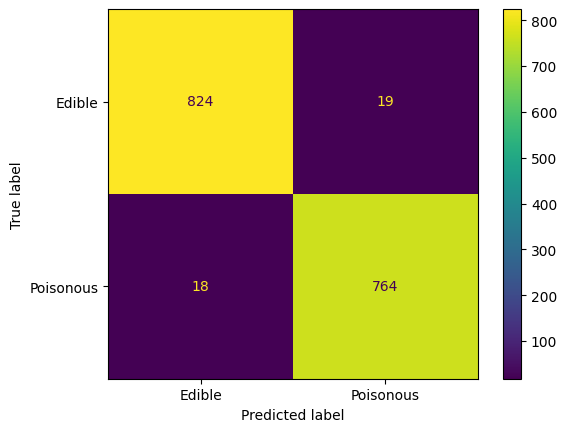

In [197]:
cm = confusion_matrix(y_test, y_pred_decision_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot()

### 4.2 Classification Report

In [198]:
cr = classification_report(y_test, y_pred_decision_tree, target_names=["Edible", "Poisonous"], output_dict=True)
models_precisions.append(cr.get("weighted avg").get("precision"))
models_recalls.append(cr.get("weighted avg").get("recall"))
models_f1_scores.append(cr.get("weighted avg").get("f1-score"))
models_supports.append(cr.get("weighted avg").get("support"))
print(classification_report(y_test, y_pred_decision_tree, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.98      0.98      0.98       843
   Poisonous       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### 4.3 ROC curve

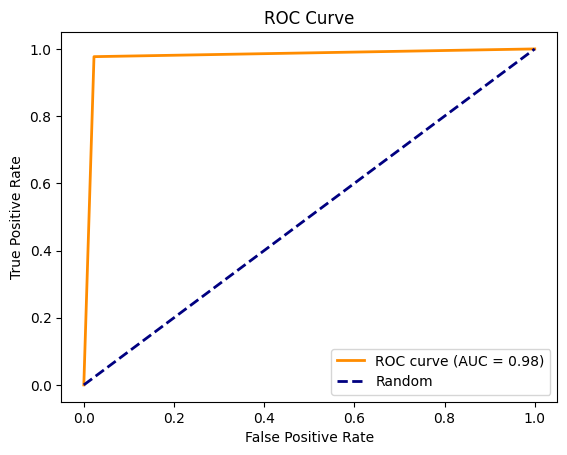

In [199]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision_tree)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 5. Random Forest

In [200]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_random_forest)
models_accuracies.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.9975384615384615


### 5.1 Confusion Matrix

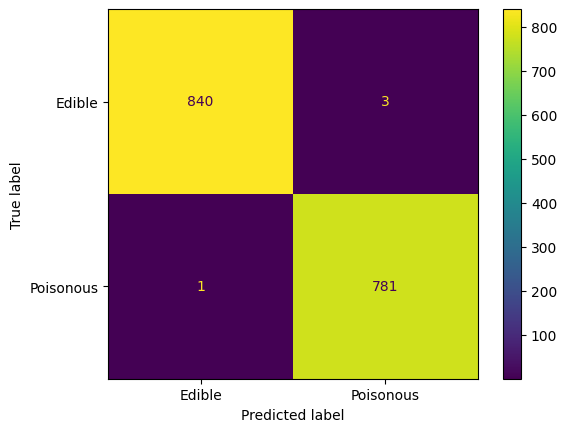

In [201]:
cm = confusion_matrix(y_test, y_pred_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot()

### 5.2 Classification Report

In [202]:
cr = classification_report(y_test, y_pred_random_forest, target_names=["Edible", "Poisonous"], output_dict=True)
models_precisions.append(cr.get("weighted avg").get("precision"))
models_recalls.append(cr.get("weighted avg").get("recall"))
models_f1_scores.append(cr.get("weighted avg").get("f1-score"))
models_supports.append(cr.get("weighted avg").get("support"))
print(classification_report(y_test, y_pred_random_forest, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### 5.3 ROC curve

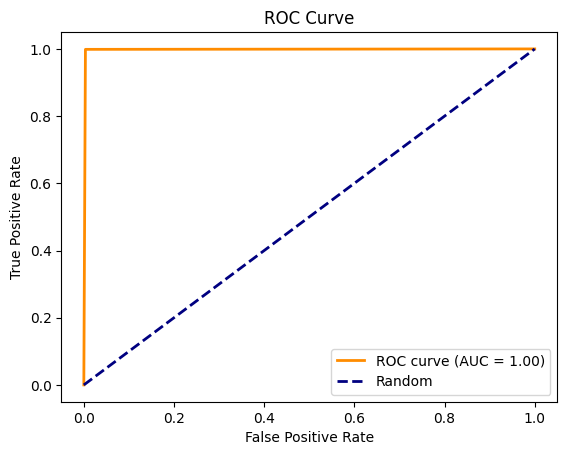

In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_random_forest)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 6. Gradient Boosting

In [204]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gradient_boosting)
models_accuracies.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.939076923076923


### 6.1 Confusion Matrix

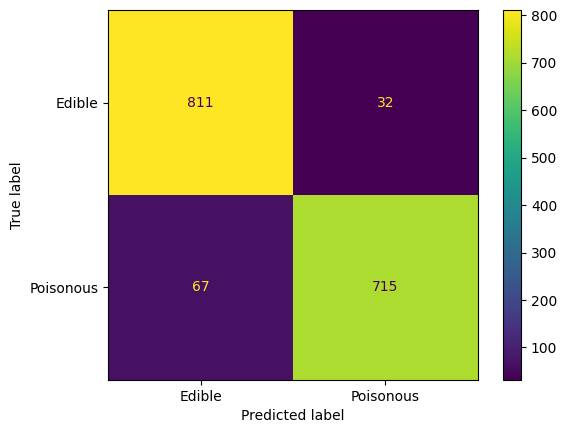

In [205]:
cm = confusion_matrix(y_test, y_pred_gradient_boosting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot()

### 6.2 Classification Report

In [206]:
cr = classification_report(y_test, y_pred_gradient_boosting, target_names=["Edible", "Poisonous"], output_dict=True)
models_precisions.append(cr.get("weighted avg").get("precision"))
models_recalls.append(cr.get("weighted avg").get("recall"))
models_f1_scores.append(cr.get("weighted avg").get("f1-score"))
models_supports.append(cr.get("weighted avg").get("support"))
print(classification_report(y_test, y_pred_gradient_boosting, target_names=["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.92      0.96      0.94       843
   Poisonous       0.96      0.91      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



### 6.3 ROC curve

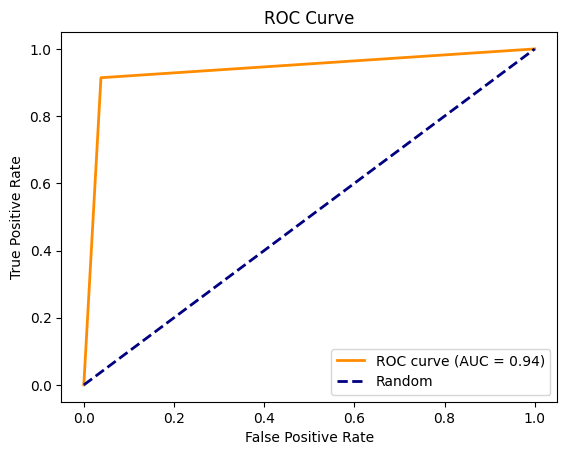

In [207]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gradient_boosting)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Comparing models

In [208]:
final_data = pd.DataFrame({"Models": models_names, "Accuracy": models_accuracies, "Avg Precision": models_precisions, "Avg Recall": models_recalls, "Avg F1 Score": models_f1_scores, "Avg Support": models_supports})
final_data

,Models,Accuracy,Avg Precision,Avg Recall,Avg F1 Score,Avg Support
0,Logistic Regression,0.834462,0.835686,0.834462,0.834038,1625.0
1,K Neighbors,0.983385,0.983518,0.983385,0.983389,1625.0
2,Support Vectore Machine,0.952000,0.952634,0.952000,0.951946,1625.0
3,Decision Tree,0.977231,0.977233,0.977231,0.977231,1625.0
4,Random Foreest,0.997538,0.997542,0.997538,0.997539,1625.0
5,Gradient Boosting,0.939077,0.939798,0.939077,0.938999,1625.0


## Comparison graphs

### Accuracy

/tmp/ipykernel_18983/2107897772.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'K Neighbors'),
 Text(2, 0, 'Support Vectore Machine'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'Random Foreest'),
 Text(5, 0, 'Gradient Boosting')]

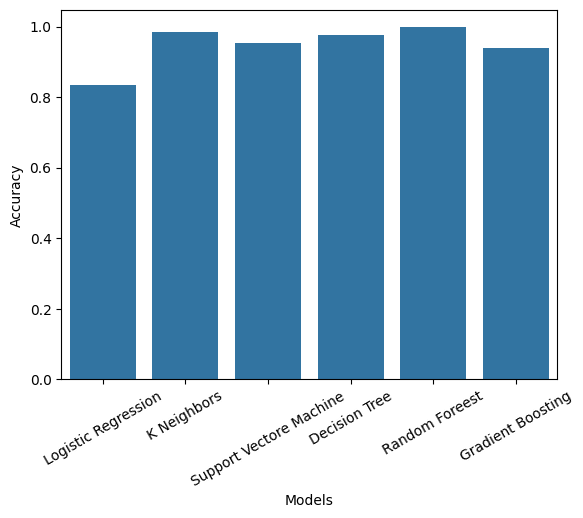

In [209]:
g = sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

### Precision

/tmp/ipykernel_18983/3741140344.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'K Neighbors'),
 Text(2, 0, 'Support Vectore Machine'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'Random Foreest'),
 Text(5, 0, 'Gradient Boosting')]

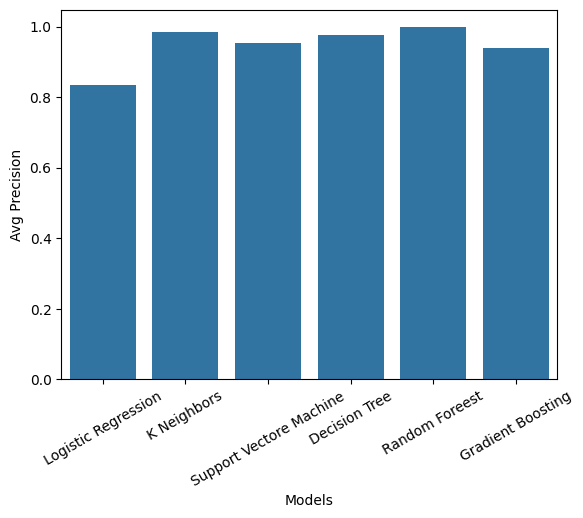

In [210]:
g = sns.barplot(x=final_data['Models'],y=final_data['Avg Precision'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

### Recall

/tmp/ipykernel_18983/1112014856.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'K Neighbors'),
 Text(2, 0, 'Support Vectore Machine'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'Random Foreest'),
 Text(5, 0, 'Gradient Boosting')]

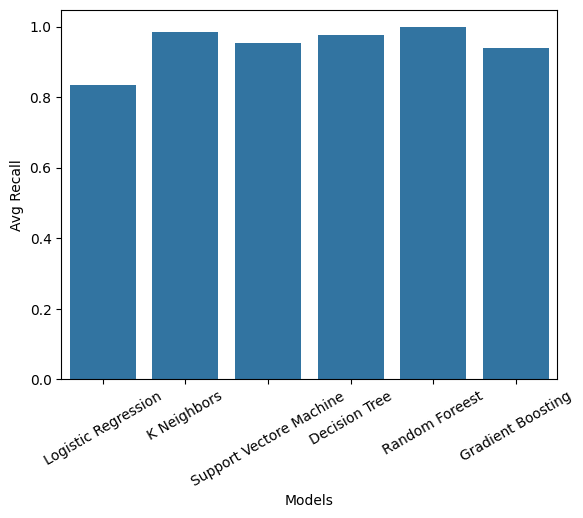

In [211]:
g = sns.barplot(x=final_data['Models'],y=final_data['Avg Recall'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

### F1 Score

/tmp/ipykernel_18983/1503862669.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'K Neighbors'),
 Text(2, 0, 'Support Vectore Machine'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'Random Foreest'),
 Text(5, 0, 'Gradient Boosting')]

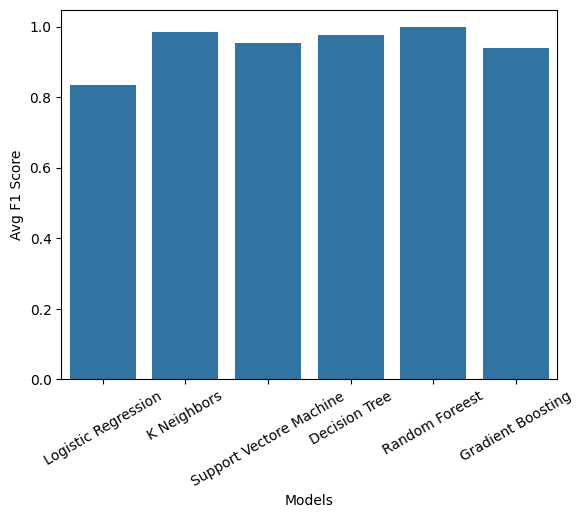

In [212]:
g = sns.barplot(x=final_data['Models'],y=final_data['Avg F1 Score'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

### Support

/tmp/ipykernel_18983/265116812.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)


[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'K Neighbors'),
 Text(2, 0, 'Support Vectore Machine'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'Random Foreest'),
 Text(5, 0, 'Gradient Boosting')]

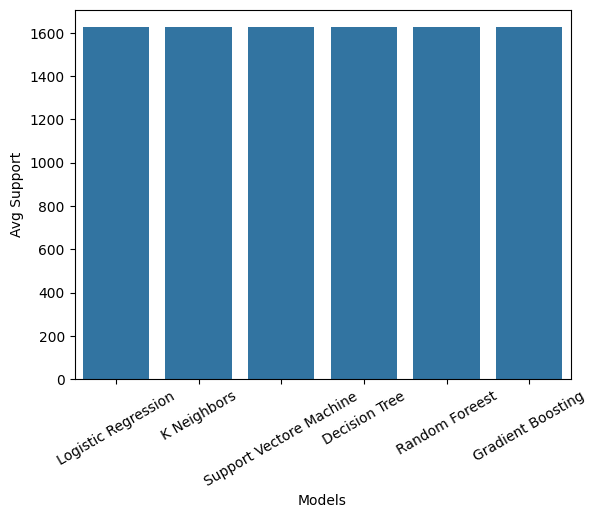

In [213]:
g = sns.barplot(x=final_data['Models'],y=final_data['Avg Support'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

# Prediction app

## Save model

In [214]:
rf_model = RandomForestClassifier()
rf_model.fit(pca_fit,y)
joblib.dump(rf_model,"Mushroom_prediction")

['Mushroom_prediction']

## User Interface

In [218]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get()) 
    p10=int(e10.get())
    p11=int(e11.get())
    
    p12=int(e12.get())
    p13=int(e13.get())
    p14=int(e14.get())
    p15=int(e15.get())
    p16=int(e16.get())
    p17=int(e17.get())
    p18=int(e18.get())
    p19=int(e19.get())
    p20=int(e20.get())
    p21=int(e21.get())
    p22=int(e22.get())
    
    model = joblib.load('Mushroom_prediction')
    result=model.predict(pca.transform([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10,p11,p12,p13,p14,p15,
                            p16,p17,p18,p19,p20,p21,p22]]))
    
    if result[0] == 0:
        Label(master, text="Edible").grid(row=31)
    else:
        Label(master, text="Poisonous").grid(row=31)
    
    
master = Tk()
master.title("Mushroom Classification Using Machine Learning")


label = Label(master, text = "Mushroom Classification Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master,text="cap-shape :(cap-shape: bell=0,conical=1,convex=5,flat=2, knobbed=3,sunken=4)").grid(row=1)
Label(master, text="cap-surface:(fibrous=0,grooves=1,scaly=3,smooth=2)").grid(row=2)
Label(master, text="cap-color:(brown=4,buff=0,cinnamon=1,gray=3,green=r, \
pink=5,purple=6,red=2,white=7,yellow=8)").grid(row=3)
Label(master, text="bruises:(bruises=1,no=0)").grid(row=4)
Label(master, text="odor:(almond=0,anise=3,creosote=1,fishy=8,foul=2,\
musty=4,none=5,pungent=6,spicy=7 \
)").grid(row=5)
Label(master, text="gill-attachment:(attached=0,descending=1,free=2,notched=3)").grid(row=6)
Label(master, text="gill-spacing:(close=0,crowded=2,distant=1 \
)").grid(row=7)
Label(master, text="gill-size:(road=0,narrow=1)").grid(row=8)
Label(master, text="gill-color:(black=4,brown=5,buff=0,chocolate=3,gray=2,green=8,orange=6,pink=7,purple=9,red=1,white=10,yellow=11)").grid(row=9)
Label(master, text="stalk-shape:(enlarging=0,tapering=1)").grid(row=10)
Label(master,text="stalk-root:( bulbous=0,club=1,cup=5,equal=2,rhizomorphs=4, \
rooted=3,missing=6)").grid(row=11)

Label(master,text="stalk-surface-above-ring:(fibrous=0,scaly=3,silky=1,smooth=2)").grid(row=12)
Label(master,text="stalk-surface-below-ring:(fibrous=0,scaly=3,silky=1,smooth=2 \
)").grid(row=13)
Label(master,text="stalk-color-above-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=14)
Label(master,text="stalk-color-below-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=15)
Label(master,text="veil-type:(partial=0,universal=1)").grid(row=16)
Label(master,text="veil-color:(brown=0,orange=1,white=2,yellow=3)").grid(row=17)
Label(master,text="ring-number:(none=0,one=1,two=2)").grid(row=18)
Label(master,text="ring-type:(cobwebby=0,evanescent=1,flaring=2,large=3,\
none=4,pendant=5,sheathing=6,zone=7)").grid(row=19)
Label(master,text="spore-print-color:(black=2,brown=3,buff=0,chocolate=1, \
green=5,orange=4,purple=6,white=7,yellow=8 \
)").grid(row=20)

Label(master,text="population:(abundant=0,clustered=1,numerous=2,scattered=3, \
# several=4,solitary=5)").grid(row=21)
Label(master,text="habitat:(grasses=1,leaves=2,meadows=3,paths=4,urban=5,\
# waste=6,woods=0)").grid(row=22)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)



e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
e14.grid(row=14,column=1)
e15.grid(row=15,column=1)
e16.grid(row=16,column=1)
e17.grid(row=17,column=1)
e18.grid(row=18,column=1)
e19.grid(row=19,column=1)
e20.grid(row=20,column=1)
e21.grid(row=21,column=1)
e22.grid(row=22,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

/home/rohitrai/miniconda3/envs/AMLMP/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
